# Prueba de datos

🔍 Buscando datos desde: c:\Users\Equipo\Desktop\Machine_DL...
✅ ¡ENCONTRADO!
📄 Archivo CSV: ..\petfinder-adoption-prediction\train\train.csv
📂 Carpeta base de datos: ..\petfinder-adoption-prediction

MASCOTA: Bubble 01 (ID: a3740bea8)
Raza:    Mixed Breed
Target:  3


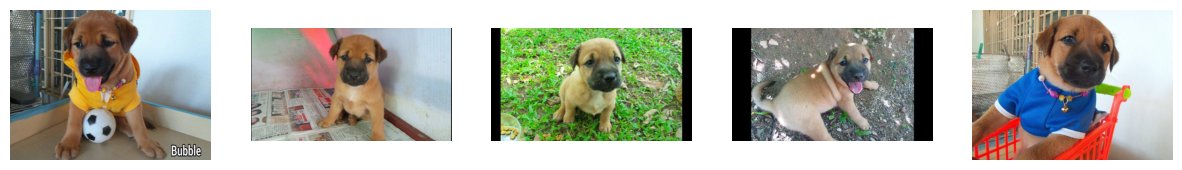

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

current_dir = os.getcwd()
search_start = ".." # Sube un nivel


print(f"🔍 Buscando datos desde: {os.path.abspath(search_start)}...")

train_path = None
root_data_folder = None

# Recorremos buscando 'train.csv'
for root, dirs, files in os.walk(search_start):
    if "train.csv" in files:
        train_path = os.path.join(root, "train.csv")
        if os.path.basename(root) == 'train':
            root_data_folder = os.path.dirname(root)
        else:
            root_data_folder = root
        
        print(f"✅ ¡ENCONTRADO!")
        print(f"📄 Archivo CSV: {train_path}")
        print(f"📂 Carpeta base de datos: {root_data_folder}")
        break

if not train_path:
    raise FileNotFoundError("❌ No se pudo localizar 'train.csv'. Asegúrate de que la carpeta 'petfinder-adoption-prediction' esté en Machine_DL.")


BREED_CSV_PATH = os.path.join(root_data_folder, 'breed_labels.csv')
COLOR_CSV_PATH = os.path.join(root_data_folder, 'color_labels.csv')
TRAIN_IMG_DIR  = os.path.join(root_data_folder, 'train_images') #


train = pd.read_csv(train_path)
breeds = pd.read_csv(BREED_CSV_PATH)
colors = pd.read_csv(COLOR_CSV_PATH)

# --- FUNCIONES DE APOYO ---
breed_dict = dict(zip(breeds['BreedID'], breeds['BreedName']))
def get_breed_name(breed_id):
    return breed_dict.get(breed_id, "Desconocido")

def visualizar_mascota(pet_id=None):
    if pet_id is None:
        pet_id = train.sample(1)['PetID'].values[0]
    
    pet_data = train[train['PetID'] == pet_id].iloc[0]
    
    print(f"\n{'='*40}")
    print(f"MASCOTA: {pet_data['Name']} (ID: {pet_id})")
    print(f"Raza:    {get_breed_name(pet_data['Breed1'])}")
    print(f"Target:  {pet_data['AdoptionSpeed']}")
    
    # Buscar imágenes en la carpeta detectada
    if os.path.exists(TRAIN_IMG_DIR):
        images = [f for f in os.listdir(TRAIN_IMG_DIR) if str(pet_id) in f and f.endswith('.jpg')]
        images.sort()
        
        if images:
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(images[:5]):
                img_path = os.path.join(TRAIN_IMG_DIR, img_file)
                img = mpimg.imread(img_path)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.axis('off')
            plt.show()
        else:
            print(">> No hay fotos para esta mascota.")
    else:
        print(f">> Carpeta de imágenes no encontrada en: {TRAIN_IMG_DIR}")

# ---EJECUTAR ---
visualizar_mascota()

# Estructura de datos y creación de un DataFrame

### Analisis del Dataset 

Primero analizamos el dataset de imagenes para la distribucion de las mismas y contemplar una posible reestructuración, ya sea de dimensiones, calidad o de número de imágenes, para que puedan ser procesadas correctamente.

In [9]:
import shutil
import os

# Definir la ruta en el nivel superior
base_nombre = 'datos tratados'
base_path_superior = os.path.join('..', base_nombre)

# Comprobar si ya existe el dataset
if os.path.exists(base_path_superior):
    print(f"✅ El dataset '{base_nombre}' ya existe en el nivel superior: {os.path.abspath(base_path_superior)}")
    print("No se han realizado cambios.")
else:
    print(f"🔍 El dataset no existe. Iniciando creación en: {os.path.abspath(base_path_superior)}")
    
    # Definir rutas de destino dentro de la carpeta superior
    train_dest = os.path.join(base_path_superior, 'Train')
    test_dest = os.path.join(base_path_superior, 'Test')
    clases = ['0', '1', '2', '3', '4']

    # Crear estructura de carpetas
    for carpeta in [train_dest, test_dest]:
        for clase in clases:
            os.makedirs(os.path.join(carpeta, clase), exist_ok=True)

    # Función para copiar archivos
    def copiar_imagenes(df, destino_base):
        count = 0
        for _, row in df.iterrows():
            # Aseguramos que la ruta de origen sea correcta (subiendo un nivel si es necesario)
            origen = row['Path']
            if not os.path.exists(origen):
                # Si el path guardado era relativo al notebook, lo ajustamos al nivel superior
                origen = os.path.join('..', origen)
            
            nombre_archivo = os.path.basename(origen)
            destino = os.path.join(destino_base, str(row['AdoptionSpeed']), nombre_archivo)
            
            if os.path.exists(origen):
                shutil.copy2(origen, destino)
                count += 1
        return count

    # Ejecutar la copia masiva
    print("🚀 Copiando imágenes a Train...")
    num_train = copiar_imagenes(train_df, train_dest)
    print(f"✅ {num_train} imágenes copiadas a Train.")

    print("🚀 Copiando imágenes a Test...")
    num_test = copiar_imagenes(val_df, test_dest)
    print(f"✅ {num_test} imágenes copiadas a Test.")

    print("\n✨ ¡Proceso finalizado! Los datos están organizados en el nivel superior.")

✅ El dataset 'datos tratados' ya existe en el nivel superior: c:\Users\Equipo\Desktop\Machine_DL\datos tratados
No se han realizado cambios.


✅ Analizando datos en: c:\Users\Equipo\Desktop\Machine_DL\datos tratados


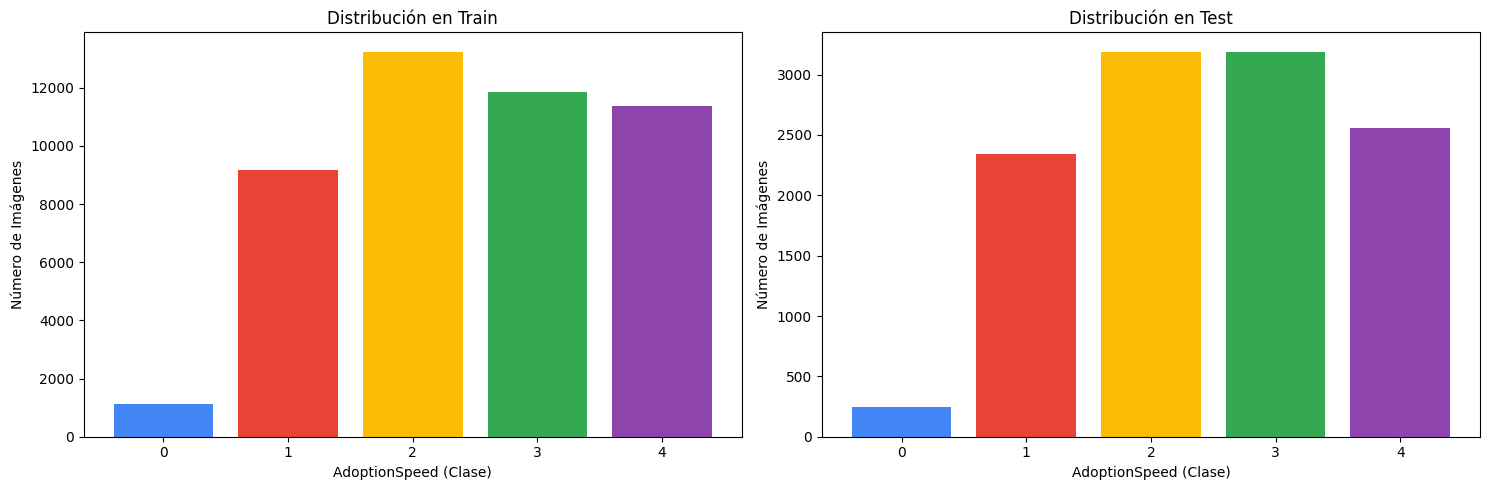

In [10]:
import matplotlib.pyplot as plt
import os

def graficar_distribucion(nombre_carpeta='datos tratados'):
    # 1. Detectar la ruta correcta de la carpeta
    # Probamos en el directorio actual y en el nivel superior
    if os.path.exists(nombre_carpeta):
        base_path = nombre_carpeta
    elif os.path.exists(os.path.join('..', nombre_carpeta)):
        base_path = os.path.join('..', nombre_carpeta) # Sube un nivel
    else:
        print(f"❌ No se encuentra la carpeta '{nombre_carpeta}'")
        print(f"Directorio actual: {os.getcwd()}")
        return

    print(f"✅ Analizando datos en: {os.path.abspath(base_path)}")

    sets = ['Train', 'Test']
    clases = ['0', '1', '2', '3', '4']
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    for i, s in enumerate(sets):
        counts = []
        for c in clases:
            # Construimos la ruta: datos tratados / [Train|Test] / [0-4]
            path = os.path.join(base_path, s, c)
            if os.path.exists(path):
                counts.append(len(os.listdir(path)))
            else:
                counts.append(0)
        
        # Colores corporativos para cada clase de velocidad de adopción
        colores = ['#4285F4', '#EA4335', '#FBBC05', '#34A853', '#8E44AD']
        ax[i].bar(clases, counts, color=colores)
        ax[i].set_title(f'Distribución en {s}')
        ax[i].set_xlabel('AdoptionSpeed (Clase)')
        ax[i].set_ylabel('Número de Imágenes')
        
        # # Añadir el número total encima de cada barra para mayor claridad
        # for j, v in enumerate(counts):
        #     ax[i].text(j, v + 5, str(v), ha='center', fontweight='bold')
    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
graficar_distribucion()

🔍 Analizando imágenes en: c:\Users\Equipo\Desktop\Machine_DL\petfinder-adoption-prediction\train_images


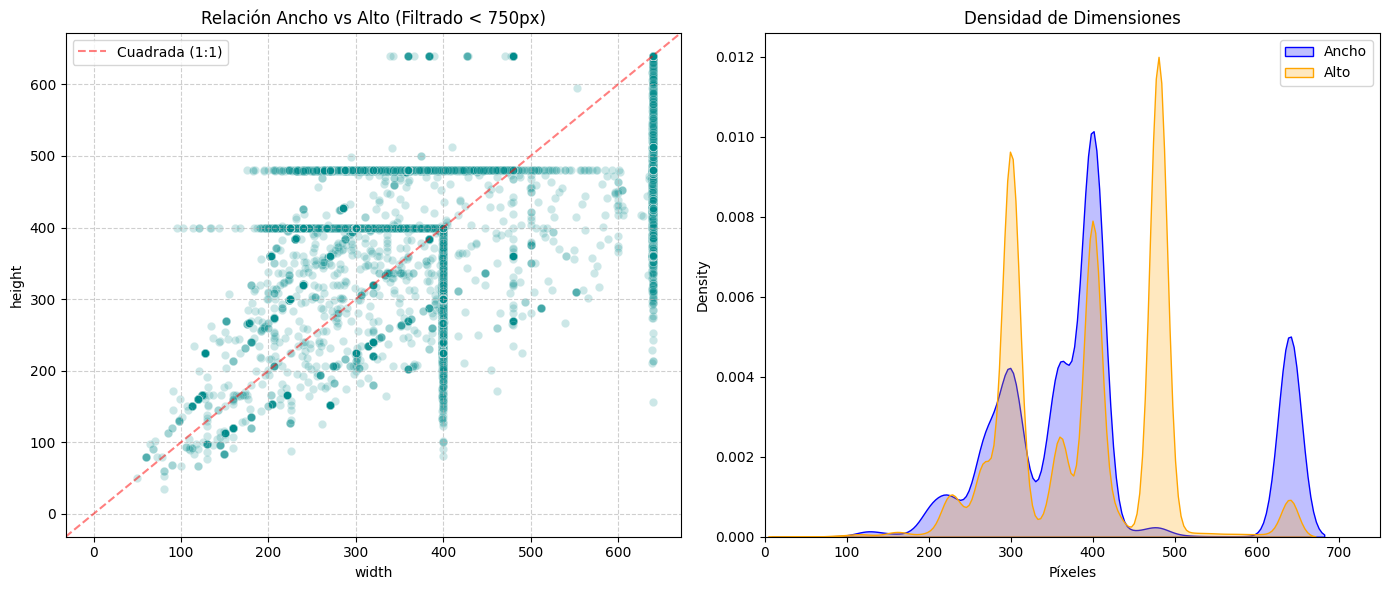


📊 Resumen de Resoluciones (Sin Outliers):
              width        height
count  58310.000000  58310.000000
mean     399.595558    389.494907
std      125.666484     93.489337
min       50.000000     35.000000
25%      300.000000    300.000000
50%      400.000000    400.000000
75%      400.000000    480.000000
max      640.000000    640.000000

📏 Relación de aspecto media: 1.07


In [11]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIGURACIÓN DE RUTAS ---
# Definimos el nombre de la carpeta de imágenes
folder_name = os.path.join('petfinder-adoption-prediction', 'train_images')

# Verificamos si la carpeta está "al lado" o "un nivel arriba"
if os.path.exists(folder_name):
    directorio = folder_name
elif os.path.exists(os.path.join('..', folder_name)):
    directorio = os.path.join('..', folder_name)
else:
    print(f"❌ Error: No se encuentra la carpeta en {os.path.abspath(folder_name)}")
    print("Asegúrate de que 'petfinder-adoption-prediction' esté en la raíz de Machine_DL.")
    # Detenemos la ejecución si no hay directorio
    raise FileNotFoundError

print(f"🔍 Analizando imágenes en: {os.path.abspath(directorio)}")

# --- RECOLECCIÓN DE DIMENSIONES ---
resoluciones = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.jpg'):
        path_completo = os.path.join(directorio, archivo)
        try:
            with Image.open(path_completo) as img:
                ancho, alto = img.size
                resoluciones.append({'width': ancho, 'height': alto})
        except:
            continue

df_res = pd.DataFrame(resoluciones)

# --- FILTRO DE OUTLIERS (Límite 750px) ---
df_res = df_res[(df_res['width'] <= 750) & (df_res['height'] <= 750)]

# --- VISUALIZACIÓN GRÁFICA ---
plt.figure(figsize=(14, 6))

# Subplot 1: Distribución Conjunta
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_res, x='width', y='height', alpha=0.2, color='darkcyan')
plt.title('Relación Ancho vs Alto (Filtrado < 750px)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', alpha=0.5, label='Cuadrada (1:1)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Subplot 2: Histogramas de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df_res['width'], label='Ancho', fill=True, color='blue')
sns.kdeplot(df_res['height'], label='Alto', fill=True, color='orange')
plt.title('Densidad de Dimensiones')
plt.xlabel('Píxeles')
plt.xlim(0, 750)
plt.legend()

plt.tight_layout()
plt.show()

# --- 5. ESTADÍSTICAS ---
print("\n📊 Resumen de Resoluciones (Sin Outliers):")
print(df_res.describe())

df_res['aspect_ratio'] = df_res['width'] / df_res['height']
print(f"\n📏 Relación de aspecto media: {df_res['aspect_ratio'].mean():.2f}")

Definimos una posible forma de data augmentation para nuestro dataset. Por ahora no la vamos a usar ya que no es necesario.

## Reestructuración del Dataset

Después de analizar el dataset, se ha decidido reestructurarlo para que sea más fácil de manejar y para que sea más fácil de entrenar el modelo. Creamos una carpeta llamada reestructured_dataset que contiene las imágenes reescaladas a 400x400.

In [17]:
from PIL import Image
import os

# Definir rutas en el nivel superior
folder_origen = os.path.join('..', 'datos tratados')
folder_destino = os.path.join('..', 'reestructured_dataset')
target_size = (400, 400)

# Comprobar si ya existe el dataset reestructurado
if os.path.exists(folder_destino):
    print(f"✅ El dataset '{os.path.basename(folder_destino)}' ya existe en: {os.path.abspath(folder_destino)}")
    print("No es necesario realizar la redimensión.")
else:
    if not os.path.exists(folder_origen):
        print(f"❌ Error: No se encuentra la carpeta origen '{folder_origen}'.")
    else:
        print(f"🚀 Iniciando reestructuración a {target_size[0]}x{target_size[1]}...")
        
        # Recorrer la estructura de 'datos tratados'
        for root, dirs, files in os.walk(folder_origen):
            # Crear la estructura de carpetas espejo en el destino
            rel_path = os.path.relpath(root, folder_origen)
            dest_path = os.path.join(folder_destino, rel_path)
            os.makedirs(dest_path, exist_ok=True)
            
            # Procesar archivos de imagen
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg')):
                    img_path_origen = os.path.join(root, file)
                    img_path_destino = os.path.join(dest_path, file)
                    
                    try:
                        with Image.open(img_path_origen) as img:
                            # Redimensionar ignorando el aspect ratio (estira/comprime)
                            # Usamos LANCZOS para mantener la máxima calidad de características
                            img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
                            
                            # Guardar en el nuevo directorio
                            img_resized.save(img_path_destino, "JPEG", quality=95)
                    except Exception as e:
                        print(f"⚠️ Error procesando {file}: {e}")

        print(f"✨ ¡Proceso finalizado! Todas las imágenes están en {os.path.abspath(folder_destino)}")

🚀 Iniciando reestructuración a 400x400...
✨ ¡Proceso finalizado! Todas las imágenes están en c:\Users\Equipo\Desktop\Machine_DL\reestructured_dataset


In [36]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# --- CONFIGURACIÓN DE RUTAS ---
original_img_dir = os.path.join('..', 'reestructured_dataset')
csv_path = os.path.join('..', 'petfinder-adoption-prediction', 'train', 'train.csv')
mini_dataset_dir = os.path.join('..', 'mini_dataset')

# 1. Cargar datos
df = pd.read_csv(csv_path)

# 2. Muestreo estratificado del 5%
# Esto asegura que si el 20% de los perros son clase 4, en tu mini dataset también lo sean
_, df_mini = train_test_split(
    df, test_size=0.05, stratify=df['AdoptionSpeed'], random_state=42
)

print(f"Creando mini dataset con {len(df_mini)} mascotas...")

# 3. Crear estructura de carpetas
for i in range(5):
    os.makedirs(os.path.join(mini_dataset_dir, str(i)), exist_ok=True)

# 4. Copiar imágenes
count = 0
for idx, row in tqdm(df_mini.iterrows(), total=len(df_mini)):
    pet_id = row['PetID']
    label = str(row['AdoptionSpeed'])
    
    # Buscar todas las fotos de esta mascota en la carpeta original
    photos = [f for f in os.listdir(original_img_dir) if f.startswith(pet_id)]
    
    for photo in photos:
        src = os.path.join(original_img_dir, photo)
        dst = os.path.join(mini_dataset_dir, label, photo)
        shutil.copy2(src, dst)
        count += 1

print(f"¡Hecho! Se han copiado {count} imágenes a {mini_dataset_dir}")

Creando mini dataset con 750 mascotas...


100%|██████████| 750/750 [00:00<00:00, 5852.30it/s]

¡Hecho! Se han copiado 0 imágenes a ..\mini_dataset


In [12]:
# Cell 1: Data Preparation (20% Balanced Subset)
import os
import shutil
import random
from glob import glob

# Config
SOURCE_DIR = os.path.join('..', 'reestructured_dataset', 'Train')
TARGET_DIR = os.path.join('..', 'mini_dataset')
CLASSES = ['0', '1', '2', '3', '4']
PERCENTAGE = 0.20

# 1. Clean existing mini_dataset
if os.path.exists(TARGET_DIR):
    print(f'Removing existing {TARGET_DIR}...')
    shutil.rmtree(TARGET_DIR)

# 2. Calculate target counts for balanced dataset
# Find class with minimum images to ensure balance if we strictly want 'same number of photos of each type'
# Or we take 20% of the TOTAL available and divide by 5.
# Let's assume we want to maximize usage: Find the smallest class count in Source,
# take 20% of THAT count (or 20% of total?), user said '20% del dataset'.
# Let's calculate total images, take 20% of that total, then divide by 5 for per-class count.

total_source_images = 0
class_counts = {}
for cls in CLASSES:
    cls_path = os.path.join(SOURCE_DIR, cls)
    if os.path.exists(cls_path):
        imgs = glob(os.path.join(cls_path, '*.*'))
        class_counts[cls] = len(imgs)
        total_source_images += len(imgs)
    else:
        class_counts[cls] = 0

target_total = int(total_source_images * PERCENTAGE)
target_per_class = target_total // len(CLASSES)

# Verify we have enough images in each class
min_class_count = min(class_counts.values()) if class_counts else 0
if target_per_class > min_class_count:
    print(f'Warning: Target per class ({target_per_class}) exceeds smallest class count ({min_class_count}).')
    print('Adjusting to use 20% of the SMALLEST class for all classes to maintain strict balance.')
    target_per_class = int(min_class_count * PERCENTAGE) # Wait, user said '20% of dataset'.
    # Interpreting '20% of dataset' AND 'same number of photos' implies we might drop data from larger classes.
    # Let's cap at min_class_count if needed, or strictly follow 20% of the whole pie split 5 ways.
    # Safer approach for 'same number': limit to min available.
    target_per_class = min(target_per_class, min_class_count)

print(f'Creating balanced subset: {target_per_class} images per class (Total: {target_per_class * 5})')

# 3. Create and Copy
os.makedirs(TARGET_DIR, exist_ok=True)
for cls in CLASSES:
    src_cls_dir = os.path.join(SOURCE_DIR, cls)
    tgt_cls_dir = os.path.join(TARGET_DIR, cls)
    os.makedirs(tgt_cls_dir, exist_ok=True)
    
    if os.path.exists(src_cls_dir):
        images = glob(os.path.join(src_cls_dir, '*.*'))
        selected_images = random.sample(images, target_per_class)
        
        for img in selected_images:
            shutil.copy(img, tgt_cls_dir)
            
print('Mini dataset created successfully.')


Removing existing ..\mini_dataset...
Adjusting to use 20% of the SMALLEST class for all classes to maintain strict balance.
Creating balanced subset: 223 images per class (Total: 1115)
Mini dataset created successfully.


# Implementacion de una red neuronal desde 0


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# from PIL import Image
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# from tqdm import tqdm
# from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

# # Configuración de rutas y parámetros
# base_path = os.path.join('..', 'reestructured_dataset')
# csv_path = os.path.join('..', 'petfinder-adoption-prediction', 'train', 'train.csv')
# checkpoint_path = os.path.join('..', 'attention_model_checkpoint.pth') # Guardado en carpeta superior
# num_batch = 4
# max_imgs = 4 

# df_full = pd.read_csv(csv_path)
# df_sample = df_full.sample(frac=0.1, random_state=42).reset_index(drop=True)

# # Dataset con padding para batches uniformes
# class PetFinderMultiImageDataset(Dataset):
#     def __init__(self, df, img_dir, transform=None):
#         self.df = df
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         pet_id = self.df.iloc[idx]['PetID']
#         label = self.df.iloc[idx]['AdoptionSpeed']
#         all_imgs = sorted([f for f in os.listdir(self.img_dir) if f.startswith(pet_id)])[:max_imgs]
        
#         images = []
#         for img_name in all_imgs:
#             try:
#                 img_path = os.path.join(self.img_dir, img_name)
#                 image = Image.open(img_path).convert('RGB')
#                 if self.transform:
#                     image = self.transform(image)
#                 images.append(image)
#             except:
#                 continue
        
#         while len(images) < max_imgs:
#             images.append(torch.zeros(3, 400, 400))
            
#         return torch.stack(images), torch.tensor(label, dtype=torch.long)

# # Arquitectura CNN con Atención
# class PetFinderAttentionNet(nn.Module):
#     def __init__(self):
#         super(PetFinderAttentionNet, self).__init__()
#         self.backbone = nn.Sequential(
#             nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
#             nn.Conv2d(32, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
#             nn.Conv2d(128, 258, 3, padding=1), nn.BatchNorm2d(258), nn.ReLU(), nn.MaxPool2d(2),
#             nn.Conv2d(258, 400, 3, padding=1), nn.BatchNorm2d(400), nn.ReLU(), nn.MaxPool2d(2)
#         )
#         self.feature_dim = 400 * 25 * 25
#         self.attention = nn.Sequential(
#             nn.Linear(self.feature_dim, 128),
#             nn.Tanh(),
#             nn.Linear(128, 1)
#         )
#         self.classifier = nn.Sequential(
#             nn.Dropout(0.2),
#             nn.Linear(self.feature_dim, 5)
#         )
#         self._init_weights()

#     def _init_weights(self):
#         for m in self.modules():
#             if isinstance(m, (nn.Conv2d, nn.Linear)):
#                 nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
#                 if m.bias is not None:
#                     nn.init.constant_(m.bias, 0)

#     def forward(self, x):
#         B, N, C, H, W = x.shape
#         x = x.view(B * N, C, H, W)
#         feats = self.backbone(x).view(B, N, -1)
#         attn_weights = F.softmax(self.attention(feats), dim=1) 
#         context = torch.sum(attn_weights * feats, dim=1)
#         logits = self.classifier(context)
#         return logits

# # Inicialización de objetos
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = PetFinderAttentionNet().to(device)
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
# transform = transforms.Compose([
#     transforms.Resize((400, 400)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# dataset = PetFinderMultiImageDataset(df_sample, base_path, transform=transform)
# dataloader = DataLoader(dataset, batch_size=num_batch, shuffle=True)

# # Lógica de carga de Checkpoint para retomar entrenamiento
# start_batch = 0
# losses = []

# if os.path.exists(checkpoint_path):
#     print(f"Cargando checkpoint desde: {checkpoint_path}")
#     checkpoint = torch.load(checkpoint_path)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     start_batch = checkpoint['batch_idx']
#     losses = checkpoint['loss_history']
#     print(f"Retomando desde el batch {start_batch}")

# # Entrenamiento
# model.train()
# progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc="Entrenando", unit="batch")

# for i, (image_stacks, labels) in progress_bar:
#     # Saltar batches si estamos retomando
#     if i < start_batch:
#         continue

#     image_stacks, labels = image_stacks.to(device), labels.to(device)
#     optimizer.zero_grad()
#     logits = model(image_stacks)
#     loss = criterion(logits, labels)
#     loss.backward()
#     optimizer.step()
    
#     current_loss = loss.item()
#     losses.append(current_loss)
#     progress_bar.set_postfix(loss=f"{current_loss:.4f}")

#     # Guardar checkpoint cada 100 batches (actualizando el mismo archivo)
#     if (i + 1) % 100 == 0:
#         torch.save({
#             'batch_idx': i + 1,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss_history': losses
#         }, checkpoint_path)

# # Gráfica de error
# plt.figure(figsize=(10,5))
# plt.plot(losses)
# plt.title('Evolución de la Pérdida')
# plt.xlabel('Iteraciones')
# plt.ylabel('Loss')
# plt.savefig('error_progression.png')

# # Función de evaluación y matriz de confusión
# def evaluate_metrics(model, loader):
#     model.eval()
#     all_preds, all_targets = [], []
#     with torch.no_grad():
#         for images, labels in loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             all_preds.extend(predicted.cpu().numpy())
#             all_targets.extend(labels.cpu().numpy())
            
#     accuracy = 100 * sum([1 for p, t in zip(all_preds, all_targets) if p == t]) / len(all_targets)
#     qwk = cohen_kappa_score(all_targets, all_preds, weights='quadratic')
    
#     print(f"\nResultados: Accuracy {accuracy:.2f}% | QWK {qwk:.4f}")

#     cm = confusion_matrix(all_targets, all_preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
#     disp.plot(cmap=plt.cm.Blues)
#     plt.title('Matriz de Confusión')
#     plt.savefig('confusion_matrix.png')
#     plt.show()

# evaluate_metrics(model, dataloader)

In [5]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, cohen_kappa_score
# import numpy as np
# import os
# import seaborn as sns

# # 1. Configuracion Inicial
# SEED = 42
# torch.manual_seed(SEED)
# np.random.seed(SEED)
# BATCH_SIZE = 32
# EPOCHS = 10
# LR = 0.001
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f'Usando dispositivo: {DEVICE}')

# # 2. Preparacion de Datos
# transform = transforms.Compose([
#     transforms.Resize((128, 128)),
#     transforms.ToTensor(),
# ])

# # Rutas relativas desde el notebook
# base_dir = os.path.dirname(os.path.abspath('__file__')) if '__file__' in locals() else os.getcwd()
# train_dir = os.path.join(base_dir, '..', 'mini_dataset')
# test_dir = os.path.join(base_dir, '..', 'reestructured_dataset', 'Test')

# if os.path.exists(train_dir) and os.path.exists(test_dir):
#     train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
#     test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
    
#     train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
#     print(f'Clases encontradas: {train_dataset.classes}')
# else:
#     print('Error: No se encuentran los directorios de datos.')
#     print(f'Buscado en: {train_dir} y {test_dir}')

# # 3. Definicion del Modelo (Simple CNN)
# class SimpleCNN(nn.Module):
#     def __init__(self, num_classes=5):
#         super(SimpleCNN, self).__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
#             nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
#             nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2)
#         )
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(64*16*16, 128), nn.ReLU(), nn.Dropout(0.5),
#             nn.Linear(128, num_classes)
#         )
#     def forward(self, x):
#         return self.classifier(self.features(x))

# model = SimpleCNN(num_classes=5).to(DEVICE)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=LR)

# # 4. Entrenamiento
# train_losses = []
# print('Iniciando entrenamiento...')
# for epoch in range(EPOCHS):
#     model.train()
#     running_loss = 0.0
#     for images, labels in train_loader:
#         images, labels = images.to(DEVICE), labels.to(DEVICE)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     epoch_loss = running_loss / len(train_loader)
#     train_losses.append(epoch_loss)
#     print(f'Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss:.4f}')

# # Graficar Loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.title('Evolucion del Loss')
# plt.xlabel('Epoca')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # 5. Evaluacion
# print('Evaluando modelo...')
# model.eval()
# all_preds = []
# all_labels = []
# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(DEVICE), labels.to(DEVICE)
#         outputs = model(images)
#         _, preds = torch.max(outputs, 1)
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

# # Metricas
# accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
# qwk = cohen_kappa_score(all_labels, all_preds, weights='quadratic')
# print(f'Accuracy: {accuracy:.4f}')
# print(f'Quadratic Weighted Kappa (QWK): {qwk:.4f}')

# # Matriz de Confusion
# cm = confusion_matrix(all_labels, all_preds)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
# plt.title('Matriz de Confusion')
# plt.ylabel('Clase Real')
# plt.xlabel('Clase Predicha')
# plt.show()

# # Limpieza de memoria
# del model
# if 'torch' in locals(): torch.cuda.empty_cache()


Epoch [10/10]: 100%|██████████| 70/70 [00:35<00:00,  1.99it/s, loss=2.03]


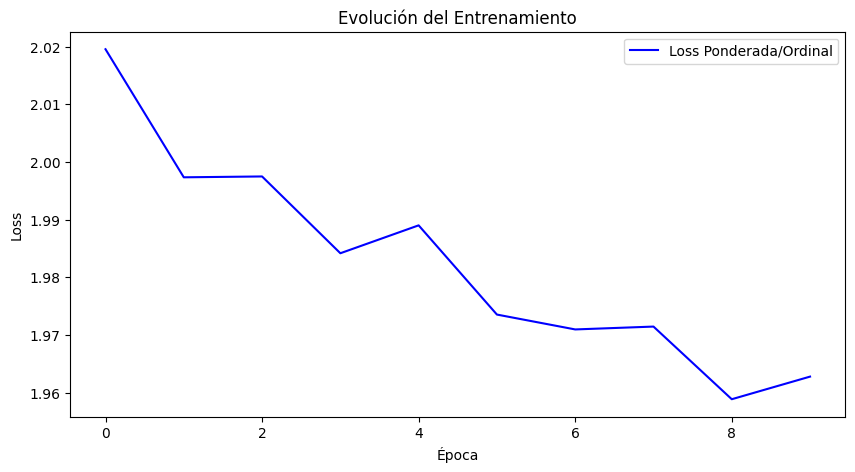

Validando: 100%|██████████| 721/721 [03:05<00:00,  3.89it/s]



Metas alcanzadas - Accuracy: 0.1680 | QWK: 0.0369


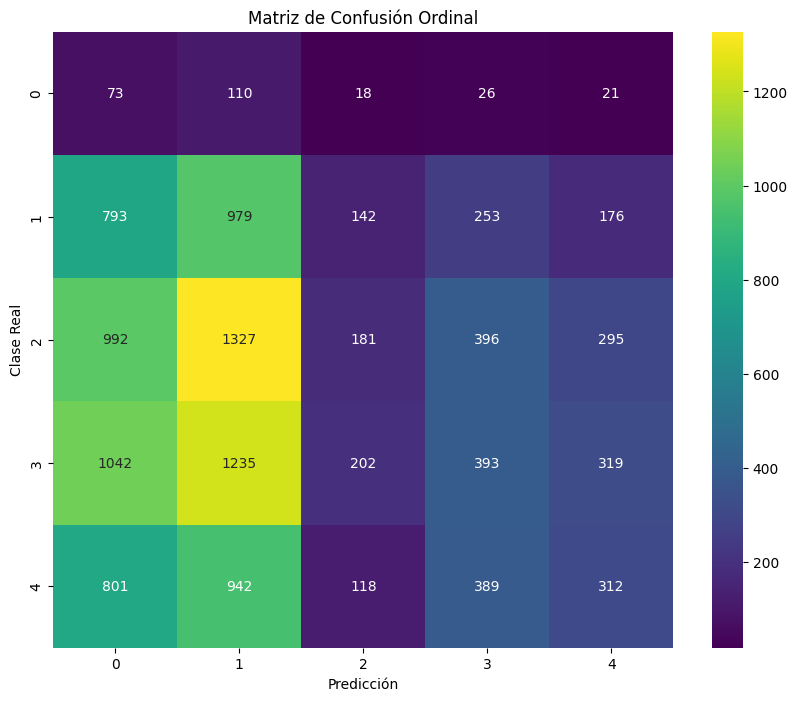

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import seaborn as sns

# Configuración global de reproducibilidad y dispositivo
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
BATCH_SIZE = 16 
EPOCHS = 10
LR = 0.0001 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformaciones para imágenes de 400x400 con aumento de datos
# Aplicamos normalización estándar para mejorar la convergencia
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Definición de rutas y carga de datos
base_dir = os.path.dirname(os.path.abspath('__file__')) if '__file__' in locals() else os.getcwd()
train_dir = os.path.join(base_dir, '..', 'mini_dataset')
test_dir = os.path.join(base_dir, '..', 'reestructured_dataset', 'Test')

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Cálculo de pesos para mitigar el desequilibrio de clases
targets = train_dataset.targets
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(targets), y=targets)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)

# Módulo de Atención Espacial para resaltar regiones críticas de la imagen
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        combined = torch.cat([avg_out, max_out], dim=1)
        attention = self.sigmoid(self.conv(combined))
        return x * attention

# Arquitectura CNN avanzada con filtros 32, 128, 258, 400
class PetAttentionCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(PetAttentionCNN, self).__init__()
        
        # Bloques Convolucionales con Batch Normalization y activación ReLU
        self.layer1 = self._make_layer(3, 32)
        self.layer2 = self._make_layer(32, 128)
        self.layer3 = self._make_layer(128, 258)
        self.layer4 = self._make_layer(258, 400)
        
        self.attention = SpatialAttention()
        self.gap = nn.AdaptiveAvgPool2d(1)
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(400, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
        
        # Inicialización He (Kaiming) para optimizar el flujo de gradientes
        self._initialize_weights()

    def _make_layer(self, in_c, out_c):
        return nn.Sequential(
            nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.attention(x)
        x = self.gap(x)
        return self.classifier(x)

# Función de pérdida ordinal personalizada
# Combina Cross Entropy con penalización por distancia para reflejar la jerarquía de las clases
class OrdinalLoss(nn.Module):
    def __init__(self, weights):
        super(OrdinalLoss, self).__init__()
        self.ce = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)

    def forward(self, outputs, targets):
        ce_loss = self.ce(outputs, targets)
        # Calculamos la esperanza matemática de la predicción para penalizar errores lejanos
        probs = F.softmax(outputs, dim=1)
        expected_label = torch.sum(probs * torch.arange(5).to(DEVICE), dim=1)
        dist_loss = F.mse_loss(expected_label, targets.float())
        return ce_loss + 0.2 * dist_loss

# Inicialización del modelo, pérdida y optimizador
model = PetAttentionCNN(num_classes=5).to(DEVICE)
criterion = OrdinalLoss(weights=class_weights)
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)

# Bucle de entrenamiento con monitoreo de progreso
train_losses = []
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f'Epoch [{epoch+1}/{EPOCHS}]', leave=True)
    
    for images, labels in loop:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    
    train_losses.append(running_loss / len(train_loader))

# Visualización del histórico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Loss Ponderada/Ordinal', color='blue')
plt.title('Evolución del Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluación final y cálculo de métricas críticas (Accuracy y QWK)
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Validando'):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generación de resultados y Matriz de Confusión
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
qwk = cohen_kappa_score(all_labels, all_preds, weights='quadratic')
print(f'\nMetas alcanzadas - Accuracy: {accuracy:.4f} | QWK: {qwk:.4f}')

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Matriz de Confusión Ordinal')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import seaborn as sns

# --- 1. CONFIGURACIÓN Y RUTAS ---
SEED = 42
torch.manual_seed(SEED)
BATCH_SIZE = 16 
EPOCHS = 3
LR = 0.001 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint_interval = 200 # Cada 200 imágenes

# Carpeta para guardar pesos
checkpoint_dir = os.path.join('..', 'checkpoints_petfinder')
os.makedirs(checkpoint_dir, exist_ok=True)

# Definición de rutas de datos
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, '..', 'reestructured_dataset', 'Train')
test_dir = os.path.join(base_dir, '..', 'reestructured_dataset', 'Test')

# --- 2. TRANSFORMACIONES Y DATOS ---
transform_sota = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_sota)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_sota)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Cálculo de pesos para mitigar el desequilibrio de clases
targets = train_dataset.targets
weights = compute_class_weight('balanced', classes=np.unique(targets), y=targets)
weights = torch.tensor(weights, dtype=torch.float).to(DEVICE)

# --- 3. ARQUITECTURA (SotA ResNet + SE) ---
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.se = SEBlock(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
    def forward(self, x):
        shortcut = self.shortcut(x)
        out = F.relu(self.bn1(x))
        out = self.conv1(out)
        out = F.relu(self.bn2(out))
        out = self.conv2(out)
        out = self.se(out)
        return out + shortcut



class PetResNet(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=7, stride=2, padding=3, bias=False)
        self.layer1 = ResidualBlock(32, 128, stride=2)
        self.layer2 = ResidualBlock(128, 258, stride=2)
        self.layer3 = ResidualBlock(258, 400, stride=2)
        self.bn_final = nn.BatchNorm2d(400)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(nn.Flatten(), nn.Dropout(0.3), nn.Linear(400, num_classes))
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d): nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d): 
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = F.relu(self.bn_final(x))
        x = self.gap(x)
        return self.classifier(x)

# --- 4. FUNCIÓN DE PÉRDIDA ---
class EnhancedOrdinalLoss(nn.Module):
    def __init__(self, weights):
        super().__init__()
        self.ce = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)
    def forward(self, outputs, targets):
        ce_loss = self.ce(outputs, targets)
        probs = F.softmax(outputs, dim=1)
        indices = torch.arange(5).to(DEVICE).float()
        expected_value = torch.sum(probs * indices, dim=1)
        mse_penalty = F.mse_loss(expected_value, targets.float())
        return ce_loss + 0.1 * mse_penalty

# --- 5. ENTRENAMIENTO CON CHECKPOINT CADA 200 IMÁGENES ---
model = PetResNet().to(DEVICE)
criterion = EnhancedOrdinalLoss(weights=weights)
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

history = []
img_count = 0
save_count = 0

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}')
    
    for imgs, labels in loop:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        img_count += imgs.size(0) # Contador de imágenes procesadas
        
        # Lógica de Checkpoint cada 200 imágenes
        if img_count >= checkpoint_interval:
            save_count += 1
            ckpt_path = os.path.join(checkpoint_dir, f'ckpt_step_{save_count}.pth')
            torch.save(model.state_dict(), ckpt_path)
            img_count = 0 # Reiniciar contador para el siguiente intervalo
            
        loop.set_postfix(loss=loss.item())
    
    scheduler.step()
    history.append(total_loss / len(train_loader))

# --- 6. EVALUACIÓN Y GRÁFICAS ---
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc='Validando'):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        out = model(imgs)
        y_pred.extend(torch.argmax(out, dim=1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Visualización
plt.figure(figsize=(12, 5))

# Gráfica Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history) + 1), history, marker='o', color='teal')
plt.title('Evolución de la Pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)

# Matriz de Confusión
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='mako', 
            xticklabels=train_dataset.classes, 
            yticklabels=train_dataset.classes)
plt.title('Matriz de Confusión Final')
plt.ylabel('Realidad')
plt.xlabel('Predicción')

plt.tight_layout()
plt.show()

# Métricas finales
qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
print(f"\n📊 QWK Final: {qwk:.4f}")
print(f"💾 Checkpoints guardados en: {checkpoint_dir}")

Epoch 1/3:   1%|          | 21/2924 [00:59<2:07:11,  2.63s/it, loss=1.92]